# Kpp

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, balanced_accuracy_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


In [3]:
#%% Get dataset
data1 = pd.read_excel("Sujet1.xlsx",sheet_name=0,header=0,index_col=0)
X1=data1.dropna() #si j'ai de valeurs manquant je le suprimme

data2 = pd.read_excel("Sujet2.xlsx",sheet_name=0,header=0,index_col=0)
X2=data2.dropna() #si j'ai de valeurs manquant je le suprimme

data3 = pd.read_excel("Sujet3.xlsx",sheet_name=0,header=0,index_col=0)
X3=data3.dropna() #si j'ai de valeurs manquant je le suprimme

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Resumo dos resultados:
    k      mean       std  ci_lower  ci_upper   ci_diff  balanced_acc_final
0   1  0.770390  0.064488  0.680866  0.859914  0.179048            0.771420
1   2  0.719863  0.049128  0.651663  0.788064  0.136401            0.720847
2   3  0.777514  0.076541  0.671257  0.883770  0.212513            0.778535
3   4  0.755724  0.074030  0.652954  0.858494  0.205541            0.756670
4   5  0.773603  0.072113  0.673494  0.873712  0.200217            0.774406
5   6  0.758865  0.083749  0.642603  0.875127  0.232524            0.759792
6   7  0.781753  0.075055  0.677561  0.885946  0.208385            0.782573
7   8  0.770154  0.065280  0.679531  0.860777  0.181246            0.770828
8   9  0.788277  0.066602  0.695819  0.880735  0.184917            0.789048
9  10  0.771358  0.077797  0.663358  0.879357  0.215999            0.772188


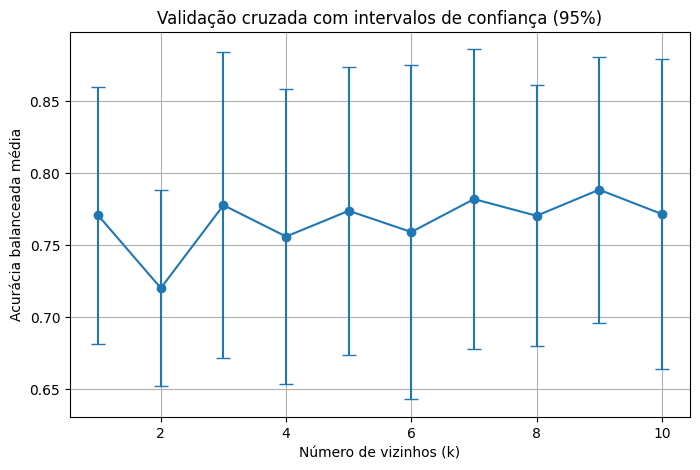

Top 3 melhores valores de k:
   k      mean   ci_diff  balanced_acc_final     score
1  2  0.719863  0.136401            0.720847  5.277533
0  1  0.770390  0.179048            0.771420  4.302709
8  9  0.788277  0.184917            0.789048  4.262879


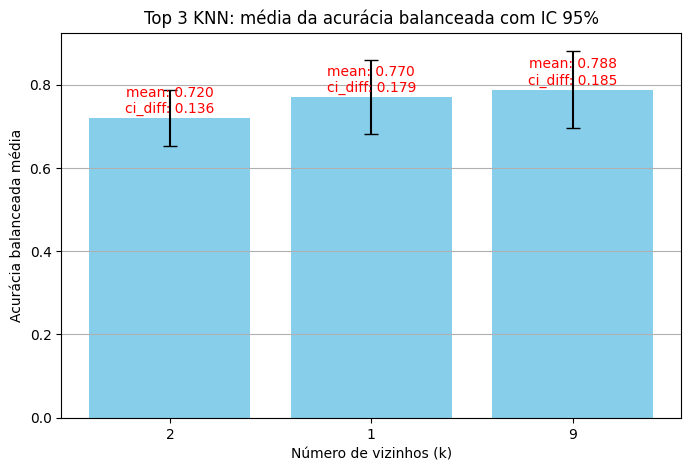

In [ ]:
from sklearn.preprocessing import StandardScaler

#%% Dados (ajuste conforme necessário)
X = X1.copy()
y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta'])  # conforme o enunciado

#%% Padronização (centrer et réduire)
scaler = StandardScaler()
XX_scaled = scaler.fit_transform(XX)  # agora XX_scaled tem média 0 e std 1

#%% Avaliação do modelo KNN para diferentes valores de vizinhos
k_values = list(range(1, 11))
print(k_values)

resultados = []

for k in k_values:
    
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Validação cruzada (balanced accuracy)
    scores = cross_val_score(model, XX_scaled, y, cv=5, scoring='balanced_accuracy')
    mean_score = scores.mean()
    std_score = scores.std()
    
    # Intervalo de confiança 95%
    ci95 = stats.t.interval(
        0.95, len(scores)-1, loc=mean_score, scale=stats.sem(scores)
    )

    ci_diff = ci95[1] - ci95[0]
    
    # Predição com validação cruzada
    y_pred = cross_val_predict(model, XX_scaled, y, cv=5)
    
    # Balanced accuracy total sobre predições
    balanced_acc_final = balanced_accuracy_score(y, y_pred)

    resultados.append({
        'k': k,
        'mean': mean_score,
        'std': std_score,
        'ci_lower': ci95[0],
        'ci_upper': ci95[1],
        'ci_diff': ci_diff,
        'balanced_acc_final': balanced_acc_final
    })

#%% Comparação dos resultados
df_resultados = pd.DataFrame(resultados)
print("\nResumo dos resultados:")
print(df_resultados)

plt.figure(figsize=(8, 5))
plt.errorbar(df_resultados['k'], df_resultados['mean'],
             yerr=[df_resultados['mean'] - df_resultados['ci_lower'],
                   df_resultados['ci_upper'] - df_resultados['mean']],
             fmt='o-', capsize=5)
plt.title('Validação cruzada com intervalos de confiança (95%)')
plt.xlabel('Número de vizinhos (k)')
plt.ylabel('Acurácia balanceada média')
plt.grid(True)
plt.show()

# Analyse des resultats
df_resultados['score'] = df_resultados['mean'] / df_resultados['ci_diff']

# Ordena decrescente pelo score
df_top3 = df_resultados.sort_values(by='score', ascending=False).head(3)
print("Top 3 melhores valores de k:")
print(df_top3[['k', 'mean', 'ci_diff', 'balanced_acc_final', 'score']])

#%% Plot dos 3 melhores com ci_diff e mean
plt.figure(figsize=(8, 5))
bars = plt.bar(df_top3['k'].astype(str), df_top3['mean'],
        yerr=[df_top3['mean'] - df_top3['ci_lower'],
              df_top3['ci_upper'] - df_top3['mean']],
        capsize=5, color='skyblue')

plt.title('Top 3 KNN: média da acurácia balanceada com IC 95%')
plt.xlabel('Número de vizinhos (k)')
plt.ylabel('Acurácia balanceada média')
plt.grid(axis='y')

# Adicionando rótulos com mean e ci_diff em cima das barras
for bar, mean_val, ci_diff in zip(bars, df_top3['mean'], df_top3['ci_diff']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.005,
             f"mean: {mean_val:.3f}\nci_diff: {ci_diff:.3f}", 
             ha='center', va='bottom', fontsize=10, color='red')

plt.show()


In [16]:
k_choisi=3

In [17]:
#%% Criação dos boxplots=

#%% Criação dos boxplots=
X=X1
y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX_scaled = scaler.fit_transform(XX)  # agora XX_scaled tem média 0 e std 1

kpp_1 = KNeighborsClassifier(n_neighbors=k_choisi)
X_kpp_1 = kpp_1.fit(XX_scaled, y)



In [18]:
#%% Criação dos boxplots=
X=X2

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX_scaled = scaler.fit_transform(XX)  # agora XX_scaled tem média 0 e std 1


kpp_2 = KNeighborsClassifier(n_neighbors=k_choisi)
X_kpp_2 = kpp_2.fit(XX_scaled, y)



In [19]:
#%% Criação dos boxplots=
#%% Criação dos boxplots=
#%% Criação dos boxplots=
X=X3
y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta']) # no enunciado esta indicado
XX_scaled = scaler.fit_transform(XX)  # agora XX_scaled tem média 0 e std 1

kpp_3 = KNeighborsClassifier(n_neighbors=k_choisi)
X_kpp_3 = kpp_3.fit(XX_scaled, y)



# 2.2 

Sujet1 - Accuracy: 0.827
Sujet1 - Balanced Accuracy: 0.746

Sujet2 - Accuracy: 0.771
Sujet2 - Balanced Accuracy: 0.743

Sujet3 - Accuracy: 0.825
Sujet3 - Balanced Accuracy: 0.831



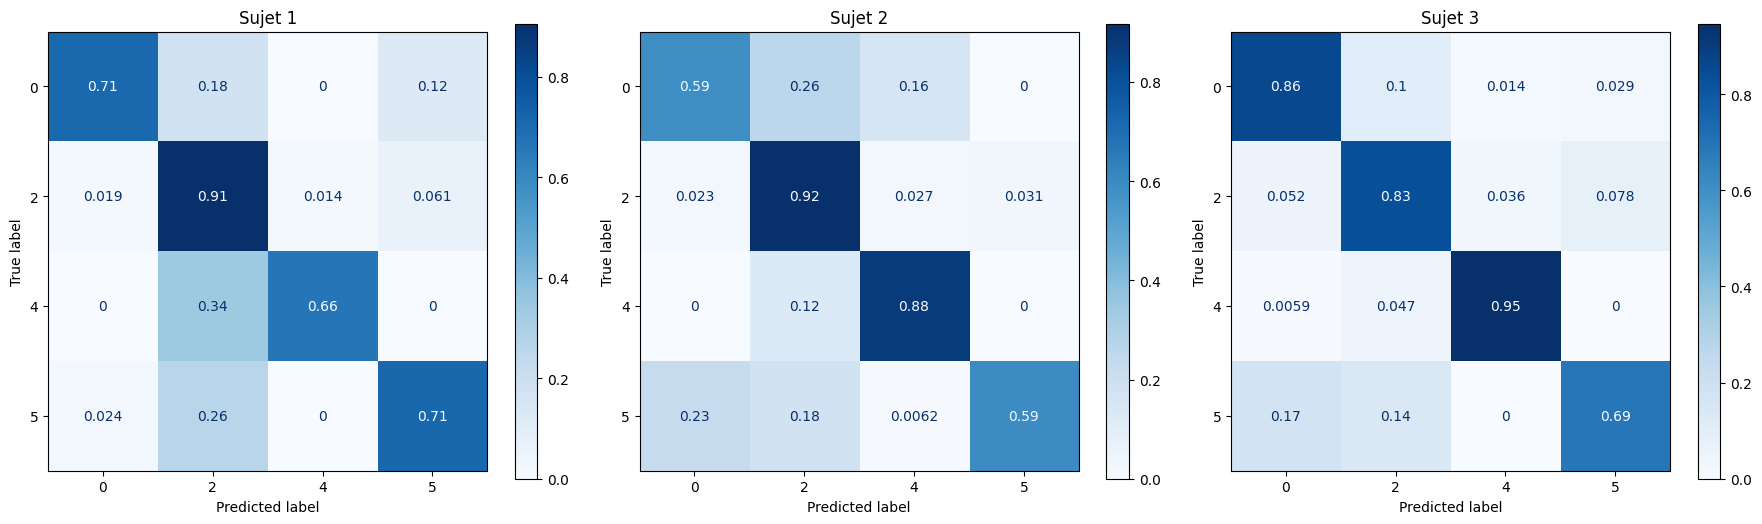

In [20]:

# Inicializar QDA com regularização
# Listas de dados e modelos
datasets = [X1, X2, X3]
kpp = [kpp_1, kpp_2, kpp_3]
labels = ['0', '2', '4', '5']

# Criar subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 linha, 3 colunas

for i, (data, kpp_model) in enumerate(zip(datasets, kpp)):
    # Separar features e labels
    X_features = data[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
    y_labels = data['phase']

    # Separar treino e validação
    X_train = X_features.iloc[0:420]
    y_train = y_labels.iloc[0:420]
    X_test = X_features.iloc[420:]
    y_test = y_labels.iloc[420:]

    # Padronização (centrer et réduire)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)  # fit no treino
    X_test_scaled = scaler.transform(X_test)        # transform no teste

    # Treinar QDA/KPP
    kpp_model.fit(X_train_scaled, y_train)
    y_pred = kpp_model.predict(X_test_scaled)


    # Matriz de confusão
    cm = confusion_matrix(y_test, y_pred,normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap='Blues',ax=axes[i], colorbar=True)
    axes[i].set_title(f"Sujet {i+1}")

    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    print(f"Sujet{i+1} - Accuracy: {acc:.3f}")
    # Balanced accuracy
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    print(f"Sujet{i+1} - Balanced Accuracy: {bal_acc:.3f}\n")

plt.tight_layout()
plt.show()


In [21]:
# Cross- Validation

#%% Dados (ajuste conforme necessário)
X = X1.copy()

y = X['phase']
X = X[['delta', 'theta', 'alpha', 'sigma', 'beta', 'puissance']]
XX = X.drop(columns=['beta'])  # conforme o enunciado
print(XX.describe())

#%% Avaliação do modelo KNN para diferentes valores de vizinhos
k_values = [1, 3, 5, 7, 9, 11]

for k in k_values:
    print(f"\n=== Avaliando KNN com k = {k} ===")
    
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Validação cruzada
    scores = cross_val_score(model, XX, y, cv=5, scoring='balanced_accuracy')
    print(f"Acurácias nas dobras: {scores}")
    
    y_pred = cross_val_predict(model, XX, y, cv=5)
    



             delta        theta        alpha        sigma    puissance
count  1445.000000  1445.000000  1445.000000  1445.000000  1445.000000
mean     66.723761    13.093118     7.674753     6.735614    19.918696
std      13.175588     5.604184     4.481174     2.936894     8.386314
min      10.057720     2.617556     0.700521     0.825997     8.380342
25%      59.176256     9.186130     5.117292     4.751959    13.429616
50%      66.142418    12.476358     7.153432     6.436712    17.649816
75%      74.155293    16.751970     9.457860     8.561729    24.019656
max      94.214166    34.663066    49.718960    19.163797    55.161853

=== Avaliando KNN com k = 1 ===
Acurácias nas dobras: [0.81499203 0.7898463  0.67152323 0.70106249 0.73915073]

=== Avaliando KNN com k = 3 ===
Acurácias nas dobras: [0.81731792 0.86014515 0.70933854 0.75770285 0.76187105]

=== Avaliando KNN com k = 5 ===
Acurácias nas dobras: [0.84675704 0.88568723 0.71016878 0.73384891 0.767719  ]

=== Avaliando KNN com k 

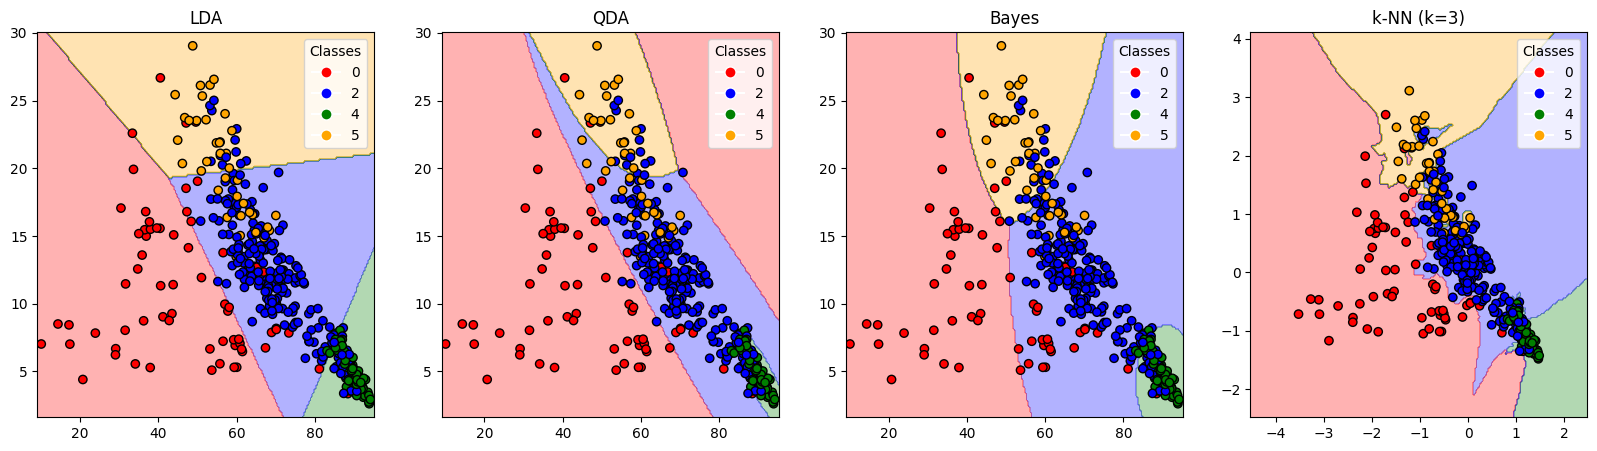

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D  # <- import correto para criar a legenda

# Seus dados já preparados
X = XX.copy()
y = X1['phase']

# Divisão manual dos dados
X_train = X.iloc[:420, :].values
y_train = y.iloc[:420].values
X_test = X.iloc[420:, :].values
y_test = y.iloc[420:].values

# Padronizador para k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Classificadores
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
bayes = GaussianNB()
knn = KNeighborsClassifier(n_neighbors=3)
classifiers = [
    ("LDA", lda, X_train, y_train),
    ("QDA", qda, X_train, y_train),
    ("Bayes", bayes, X_train, y_train),
    ("k-NN (k=3)", knn, X_train_scaled, y_train)  # usa dados padronizados
]

# Definir cores fixas (adapte se tiver mais classes)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta']

# Função para plotar regiões de decisão com cores consistentes
def plot_decision_boundary(clf, X, y, ax, title):
    # Mapear classes para índices consecutivos
    classes = np.unique(y)
    class_to_index = {cls: i for i, cls in enumerate(classes)}
    y_index = np.array([class_to_index[c] for c in y])
    
    cmap = ListedColormap(colors[:len(classes)])
    
    clf.fit(X, y)
    
    # Criar meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    
    # Prever cada ponto do grid e mapear para índice
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_index = np.array([class_to_index[z] for z in Z])
    Z_index = Z_index.reshape(xx.shape)
    
    # Plot da região de decisão
    ax.contourf(xx, yy, Z_index, alpha=0.3, cmap=cmap)
    
    # Scatter plot dos dados
    ax.scatter(X[:, 0], X[:, 1], c=y_index, edgecolor='k', cmap=cmap)
    
    # Legenda
    handles = [Line2D([0], [0], marker='o', color='w',
                      markerfacecolor=colors[i], markersize=8, label=str(cls)) 
               for i, cls in enumerate(classes)]
    ax.legend(handles=handles, title="Classes")
    ax.set_title(title)

# Plot
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
for ax, (name, clf, Xc, yc) in zip(axes, classifiers):
    plot_decision_boundary(clf, Xc[:, :2], yc, ax, name)

plt.show()
